# Обучение без учителя

#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.##

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.datasets import load_boston

Загрузим датасет "Boston House Prices"

In [3]:
boston = load_boston()

Создадим датасеты X и y

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Разобьём данные на тренировочные и тестовые

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируем данные с помощью StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

Построим модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f"До:\t{X_train_scaled.shape}")
print(f"После:\t{X_train_tsne.shape}")

До:	(404, 13)
После:	(404, 2)


Построим диаграмму рассеяния на этих данных

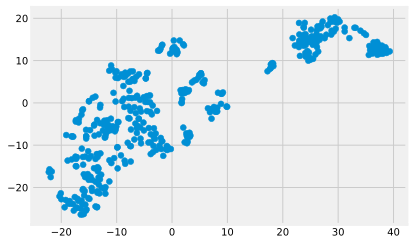

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

С помощью KMeans разобьём данные из тренировочного набора на 3 кластера

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

Разобьём данные на 3 кластера

In [58]:
train_labels = kmeans.fit_predict(X_train_scaled)

print(f'Результат разбиения:\n{train_labels}')

Результат разбиения:
[1 2 0 1 2 2 2 0 1 1 2 2 2 1 2 2 2 0 2 0 1 2 0 2 0 2 1 0 2 0 2 2 1 1 2 0 0
 2 2 0 0 2 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 0 2 1 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 0 2 1 1 2 1 2 0 0 0 2 2 0 2 2 2 1
 0 2 0 0 1 1 1 2 2 2 1 1 2 0 1 1 0 0 1 0 2 2 2 2 1 2 0 2 1 2 1 2 2 2 1 2 2
 2 2 2 1 0 2 0 1 1 1 1 1 0 2 1 2 1 0 0 2 0 2 2 0 0 1 0 0 1 1 0 2 2 2 1 2 1
 1 0 0 1 1 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 0 2 2 2 2 0 2 1 2 1 0 1 2 1 1 1
 1 2 2 0 0 2 0 2 1 2 2 2 2 2 1 1 0 2 2 0 0 1 1 2 0 1 1 2 0 0 1 2 0 1 2 2 1
 2 1 2 2 0 2 2 2 2 2 2 0 1 2 1 2 2 0 2 1 1 0 1 2 1 2 2 1 0 0 2 1 0 1 1 1 2
 0 1 2 2 2 2 2 2 1 0 2 1 0 0 2 0 2 0 2 1 0 2 2 2 0 1 2 1 1 2 1 0 2 2 1 2 1
 1 2 2 1 0 2 2 0 2 2 2 1 2 2 2 2 1 2 1 2 0 0 1 0 1 2 1 0 2 1 0 2 0 2 0 2 0
 2 2 1 2 0 1 0 1 2 1 0 2 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 0 2 2 2 0 1 2]


Построим диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасим точки из разных кластеров разными цветами

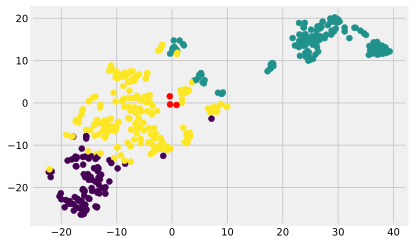

In [59]:
centers = kmeans.cluster_centers_

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], color='red')

plt.show()

**Разбиение похоже на правду, но центры почему-то отражаются неверно** :-(

Вычислим средние значения price и CRIM в разных кластерах

In [78]:
print("Средние значения в кластерах:")
print(f"Кластер 1. price = {y_train[train_labels == 0].mean()},\tCRIM = {X_train['CRIM'][train_labels == 0].mean()}")
print(f"Кластер 2. price = {y_train[train_labels == 1].mean()},\tCRIM = {X_train['CRIM'][train_labels == 1].mean()}")
print(f"Кластер 3. price = {y_train[train_labels == 2].mean()},\tCRIM = {X_train['CRIM'][train_labels == 2].mean()}")

Средние значения в кластерах:
Кластер 1. price = 27.78837209302326,	CRIM = 0.07356558139534886
Кластер 2. price = 16.165354330708663,	CRIM = 10.797028425196853
Кластер 3. price = 24.958115183246072,	CRIM = 0.42166020942408367


#### Задание 3*
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных

In [81]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_test_tsne = tsne.fit_transform(X_test_scaled)

In [82]:
test_labels = kmeans.fit_predict(X_test_scaled)

print(f'Результат разбиения:\n{test_labels}')

Результат разбиения:
[1 0 2 1 2 1 1 2 2 1 1 1 2 1 1 2 1 2 0 2 1 0 1 1 2 2 1 2 1 1 1 1 2 2 2 2 1
 1 1 1 1 1 0 1 1 2 1 1 2 1 1 0 1 1 0 2 2 0 1 1 0 0 1 1 0 1 2 1 0 2 1 2 2 0
 1 2 1 0 2 2 1 2 0 2 1 1 2 1 1 1 1 2 1 1 2 1 2 2 2 2 1 1]


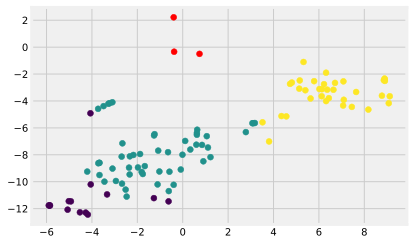

In [83]:
test_centers = kmeans.cluster_centers_

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)
plt.scatter(test_centers[:, 0], test_centers[:, 1], color='red')

plt.show()

In [84]:
print("Средние значения в кластерах на тестовых данных:")
print(f"Кластер 1. price = {y_test[test_labels == 0].mean()},\tCRIM = {X_test['CRIM'][test_labels == 0].mean()}")
print(f"Кластер 2. price = {y_test[test_labels == 1].mean()},\tCRIM = {X_test['CRIM'][test_labels == 1].mean()}")
print(f"Кластер 3. price = {y_test[test_labels == 2].mean()},\tCRIM = {X_test['CRIM'][test_labels == 2].mean()}")

Средние значения в кластерах на тестовых данных:
Кластер 1. price = 33.871428571428574,	CRIM = 0.08618571428571427
Кластер 2. price = 21.552830188679245,	CRIM = 0.25200716981132076
Кластер 3. price = 16.43714285714286,	CRIM = 10.165531142857143
